In [1]:
%matplotlib inline
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Завантаження файлу

In [2]:
uploaded = files.upload()

Saving Housing.csv to Housing.csv


# Завантаження даних

In [3]:
df = pd.read_csv('Housing.csv')
print("Перші 5 рядків таблиці:")
print(df.head())

X = df[['area', 'bathrooms', 'bedrooms']].values  # матриця ознак
y = df['price'].values  # вектор значень

Перші 5 рядків таблиці:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Масштабування ознак

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Додаємо стовпець одиниць для w0 (вільний член)

In [5]:
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Функція гіпотези

In [6]:
def hypothesis(X, w):
    return np.dot(X, w)

# Функція втрат

In [7]:
def loss_function(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

# Одна ітерація градієнтного спуску

In [8]:
def gradient_step(X, y, w, alpha):
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w = w - alpha * gradient
    return w

# Пошук найкращих параметрів за допомогою градієнтного спуску з відображенням графіка

In [9]:
def gradient_descent(X, y, w, alpha, iterations):
    loss_history = []  # Список для збереження значень функції втрат
    for i in range(iterations):
        w = gradient_step(X, y, w, alpha)
        loss = loss_function(X, y, w)
        loss_history.append(loss)  # Додаємо значення функції втрат в список
    return w, loss_history

# Аналітичне рішення

In [10]:
def analytical_solution(X, y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

# Перевірка результатів за допомогою scikit-learn

In [11]:
def compare_with_sklearn(X_scaled, y):
    model = LinearRegression()
    model.fit(X_scaled[:, 1:], y)  # без стовпця одиниць
    return model.coef_, model.intercept_

# Початкові параметри для градієнтного спуску

In [12]:
w_init = np.random.randn(X_scaled.shape[1]) * 0.01  # Початкові ваги з малими випадковими значеннями
alpha = 0.01 # крок градієнтного спуску
iterations = 3000

# Виконання градієнтного спуску

In [13]:
w_gd, loss_history = gradient_descent(X_scaled, y, w_init, alpha, iterations)
# Оцінка функції втрат після завершення градієнтного спуску
print("\nПідсумкові результати після завершення градієнтного спуску:")
loss_final = loss_function(X_scaled, y, w_gd)
print(f"Функція втрат після {iterations} ітерацій: {loss_final}")


Підсумкові результати після завершення градієнтного спуску:
Функція втрат після 3000 ітерацій: 895585024988.6597


# Порівняння з аналітичним рішенням

In [14]:
w_analytical = analytical_solution(X_scaled, y)
print("\nРезультати з аналітичним рішенням:")
print("Параметри (w) за аналітичним рішення:")
print(w_analytical)


Результати з аналітичним рішенням:
Параметри (w) за аналітичним рішення:
[4766729.24770642  821214.14349519  695808.52272538  299983.57107963]


# Порівняння зі sklearn

In [15]:
coef_sklearn, intercept_sklearn = compare_with_sklearn(X_scaled, y)
print("\nРезультати за допомогою scikit-learn:")
print("Параметри (w) з sklearn:", coef_sklearn)
print("Перехід (Intercept):", intercept_sklearn)

print("\nМаксимальна різниця (градієнт vs аналітичне р.):", np.max(np.abs(w_gd - w_analytical)))
print("Максимальна різниця (градієнт vs sklearn):", np.max(np.abs(w_gd[1:] - coef_sklearn)))


Результати за допомогою scikit-learn:
Параметри (w) з sklearn: [821214.14349519 695808.52272537 299983.57107963]
Перехід (Intercept): 4766729.247706422

Максимальна різниця (градієнт vs аналітичне р.): 0.0011448391014710069
Максимальна різниця (градієнт vs sklearn): 0.0011448299046605825


# Графік функції втрат

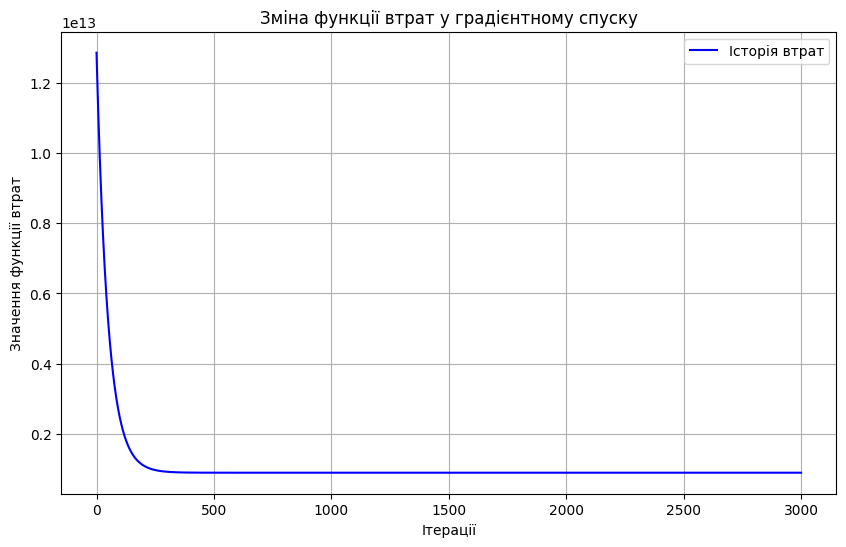

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), loss_history, label='Історія втрат', color='blue')
plt.xlabel('Ітерації')
plt.ylabel('Значення функції втрат')
plt.title('Зміна функції втрат у градієнтному спуску')
plt.legend()
plt.grid(True)

# Графік порівняння передбачень з діагональною лінією

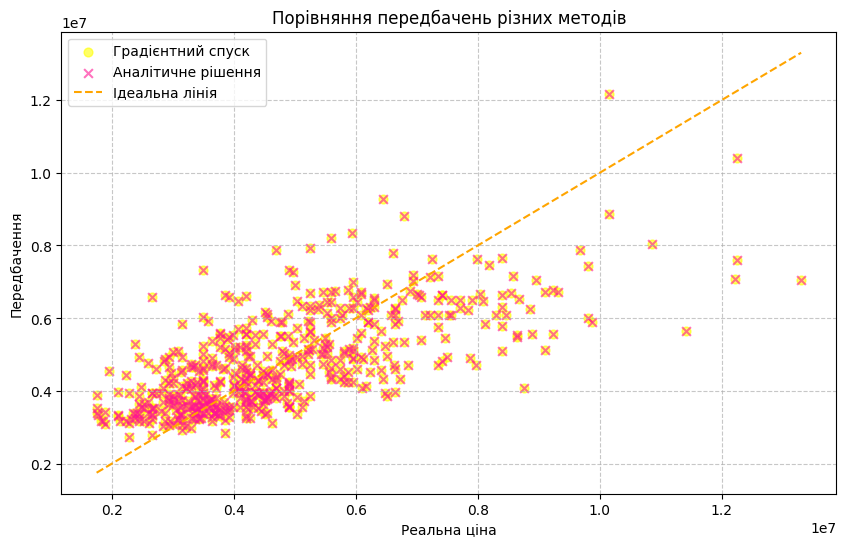

In [17]:
predictions_gd = hypothesis(X_scaled, w_gd)  # Передбачення після градієнтного спуску
predictions_analytical = hypothesis(X_scaled, w_analytical)  # Передбачення аналітичним методом

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_gd, alpha=0.6, label='Градієнтний спуск', color='yellow', s=40, marker='o')
plt.scatter(y, predictions_analytical, alpha=0.6, label='Аналітичне рішення', color='#FF1493', s=40, marker='x')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', linestyle='--', label='Ідеальна лінія')

plt.xlabel('Реальна ціна')
plt.ylabel('Передбачення')
plt.title('Порівняння передбачень різних методів')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()